In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from scipy.stats import mannwhitneyu
import numpy as np

In [2]:
results = pd.read_csv('../main/log/elite_change.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size","log","elite_child"])

In [3]:
results.threshold.unique()

array([ 100,  250,  500,  750,  900, 1000], dtype=int64)

In [4]:
chull = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size","distance_chull", "elite_child"])

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_14788\1298671308.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  chull = pd.read_csv('../main/log/chull.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",


In [5]:
chull.algo.unique()

array(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG', 'STD-GSGP', 'GSGP*1SIG',
       'GSGP*1NORM'], dtype=object)

In [6]:
chull.algo = chull.algo.replace({'STD-GSGP':'SLIM+2SIG', 'GSGP*1SIG':'SLIM*1SIG',
       'GSGP*1NORM':'SLIM*1NORM'})

In [7]:
chull.drop_duplicates(subset = ["algo",  "threshold", "dataset", "seed", "generation"], keep = 'last', inplace = True)

In [8]:
chull.head()

,algo,experiment_id,threshold,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,distance_chull,elite_child
0,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,0,15.497589,0.073017,1490.0,14.884969,7,1962.001661,NaN
1,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,1,15.378736,0.079386,1968.0,14.561405,7,2233.607323,NaN
2,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,2,15.221442,0.074056,2866.0,14.249313,39,2190.476519,NaN
3,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,3,15.221442,0.076040,3690.0,14.249313,39,2195.840218,NaN
4,SLIM*1SIG,f2a83a12-168b-11ef-9a77-049226d8b1cb,100,yatch,0,4,15.103075,0.076018,4636.0,14.075436,97,2176.073049,NaN


In [9]:
results.shape

(4045555, 13)

In [10]:
results = results.merge(chull[["algo",  "threshold", "dataset", "seed", "generation", 'distance_chull']], how = 'left', on = ["algo",  "threshold", "dataset", "seed", "generation"])

In [11]:
results = results[results.dataset != '50'].reset_index(drop = True)

In [12]:
results.threshold = results.threshold.astype(int)

In [13]:
results.drop_duplicates(subset = ["algo",  "threshold", "dataset", "seed", "generation"], keep = 'last', inplace = True)

In [14]:
results.head()

,algo,experiment_id,threshold,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log,elite_child,distance_chull
34,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,0,15.497589,0.076020,1490.0,14.884969,7,1,False,1962.001661
35,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,1,15.497589,0.135038,3283.0,14.884969,7,1,True,2250.345450
36,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,2,15.497589,0.137035,5686.0,14.884969,7,1,True,2285.700061
37,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,3,15.480033,0.123031,7632.0,14.574218,52,1,False,2296.658135
38,SLIM+2SIG,be361715-2fa8-11ef-87b1-049226d8b1cb,100,yatch,0,4,15.476914,0.126031,8546.0,14.887196,26,1,False,2312.083156


In [15]:
results.algo.unique()

array(['SLIM+2SIG', 'SLIM*1SIG', 'SLIM*1NORM', nan], dtype=object)

In [16]:
colors = ['lightsalmon', 'lightblue', 'lightgreen']
e_colors = ['red', 'blue', 'green']
e_style = ['dashed', 'dotted', 'dashdot']

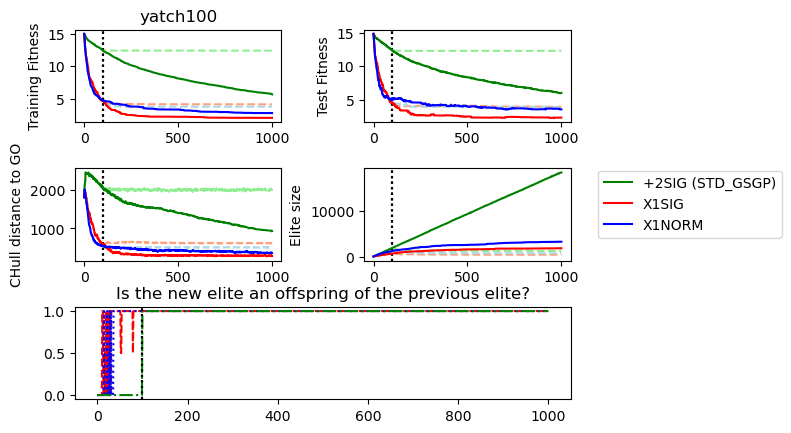

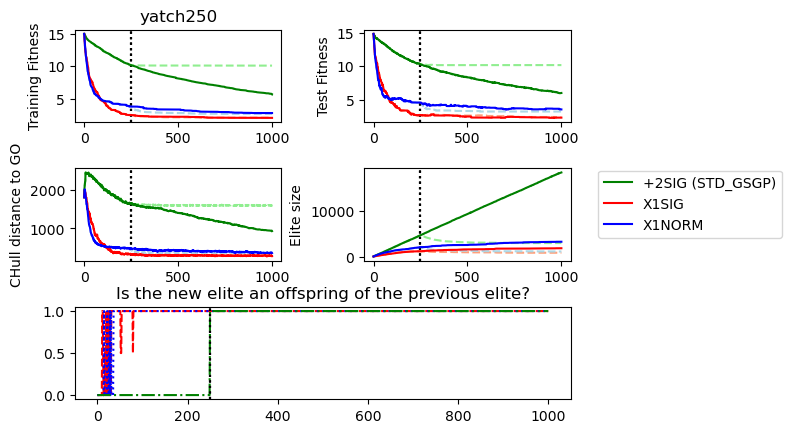

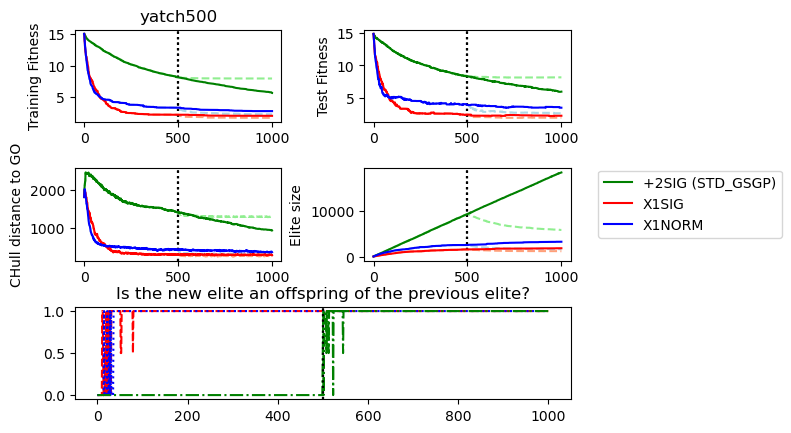

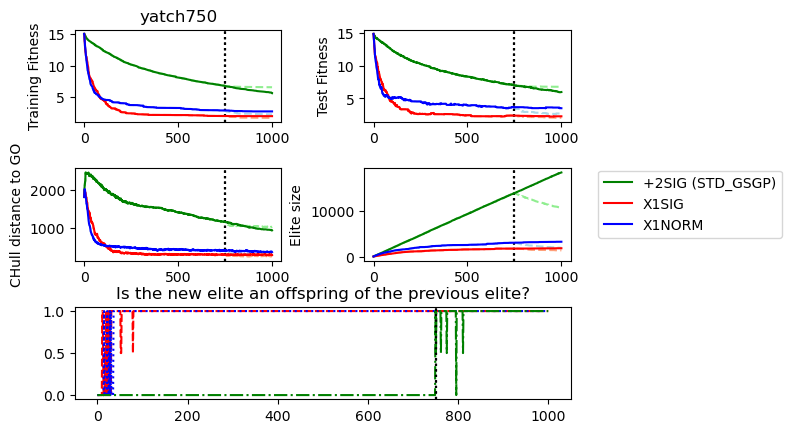

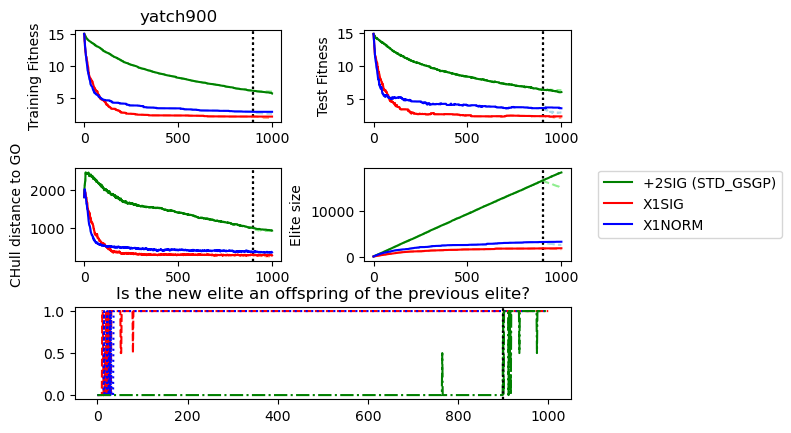

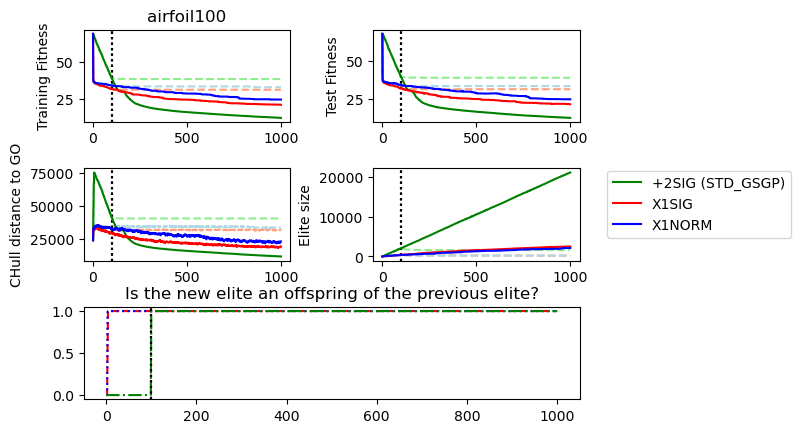

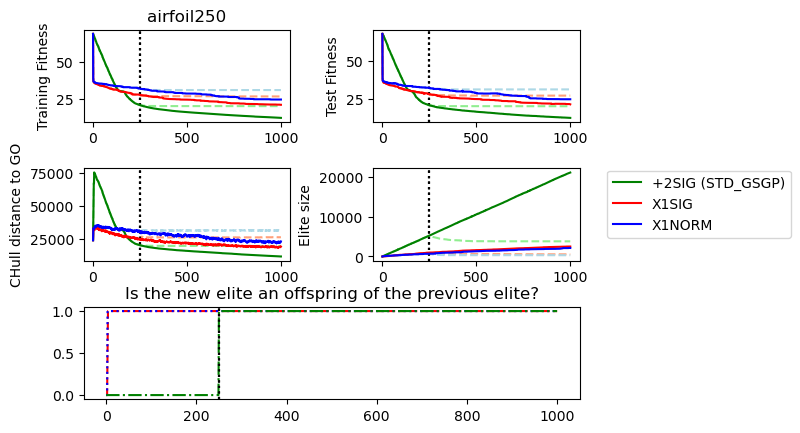

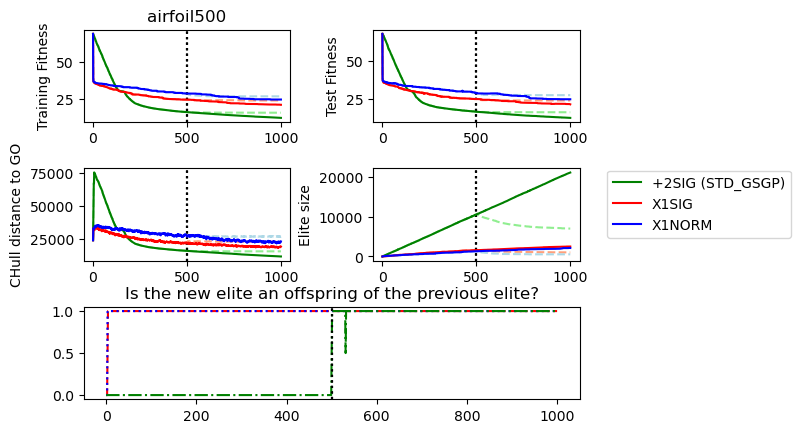

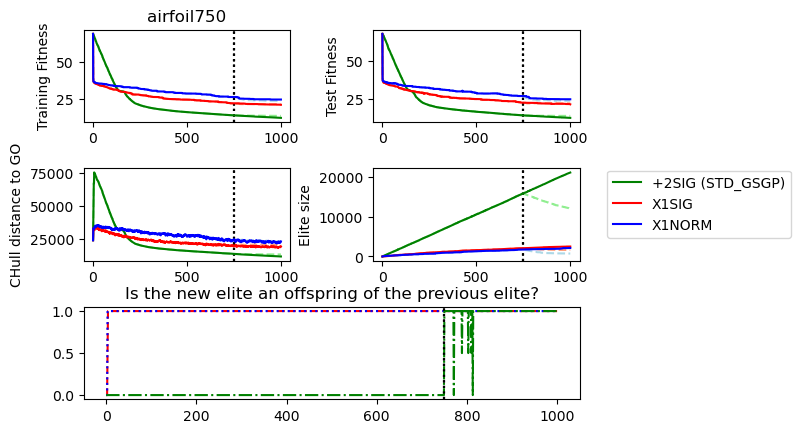

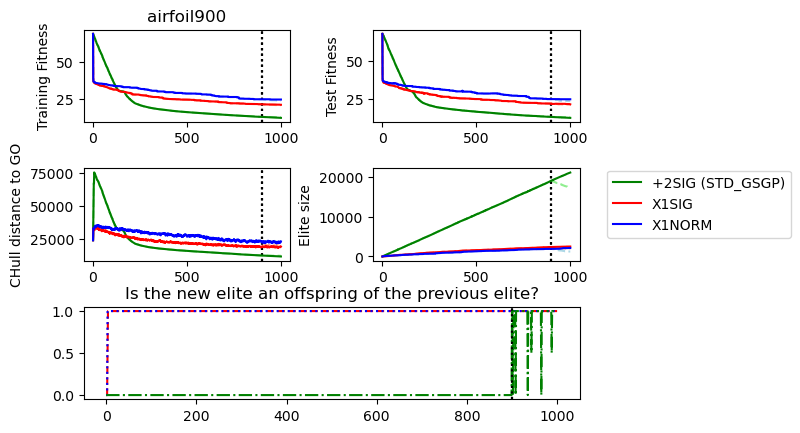

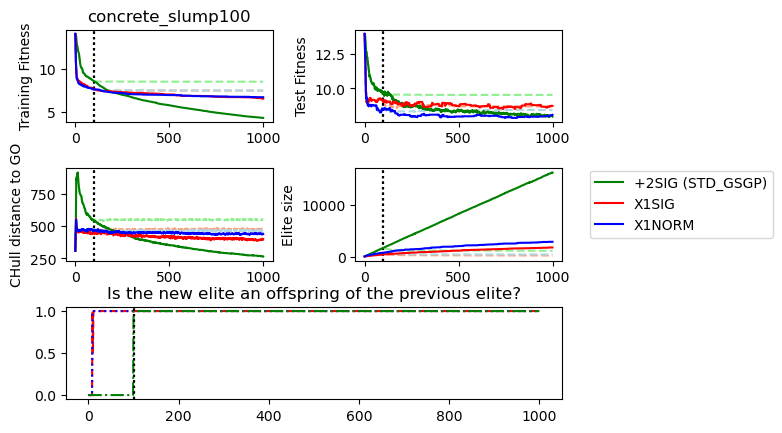

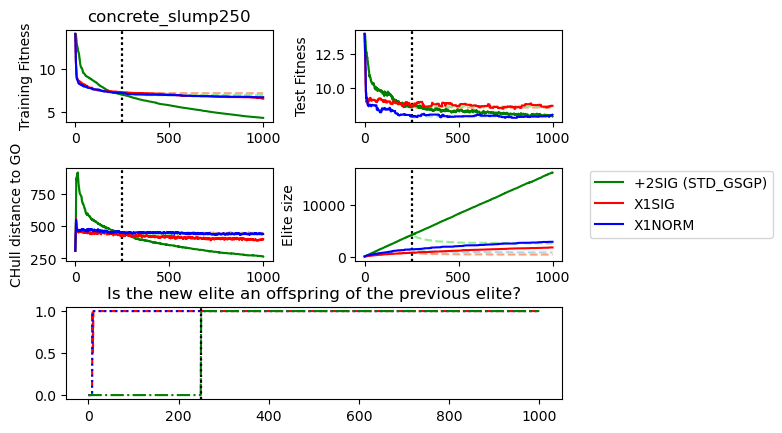

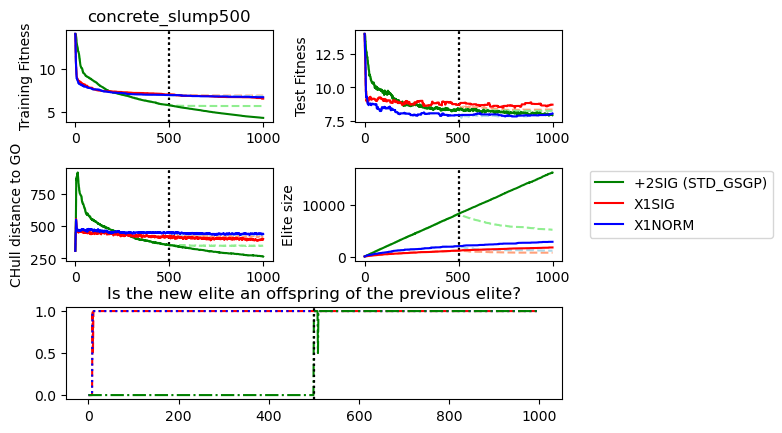

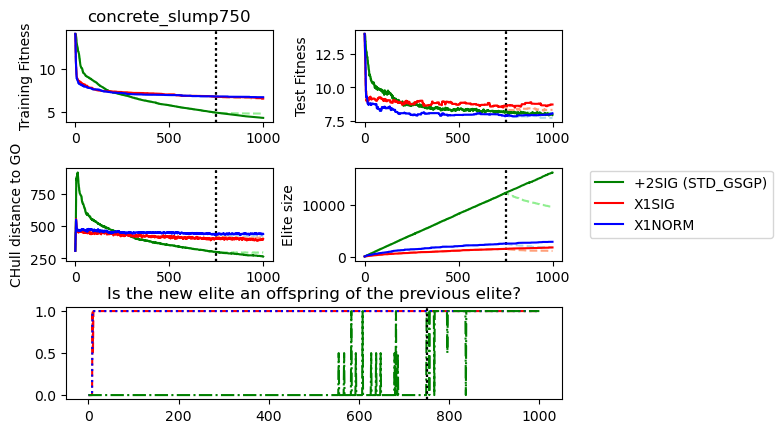

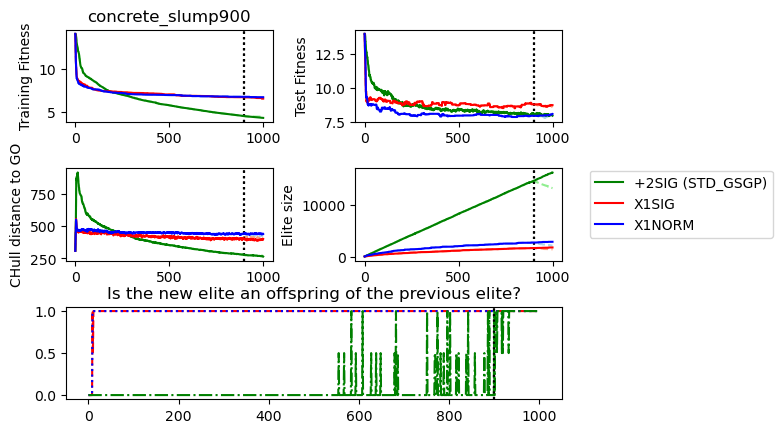

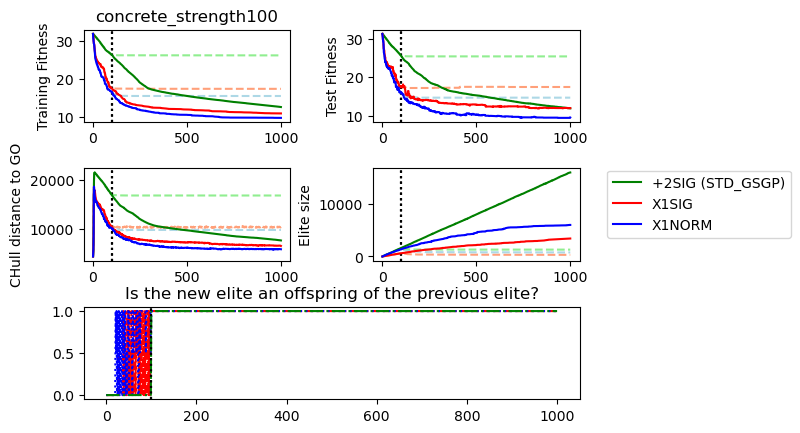

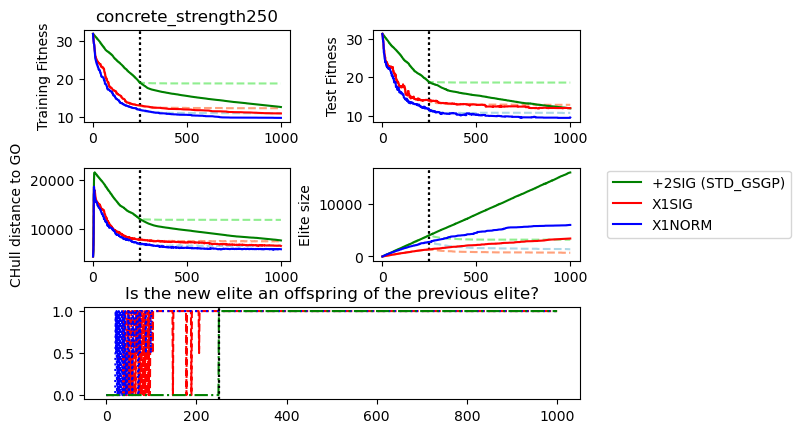

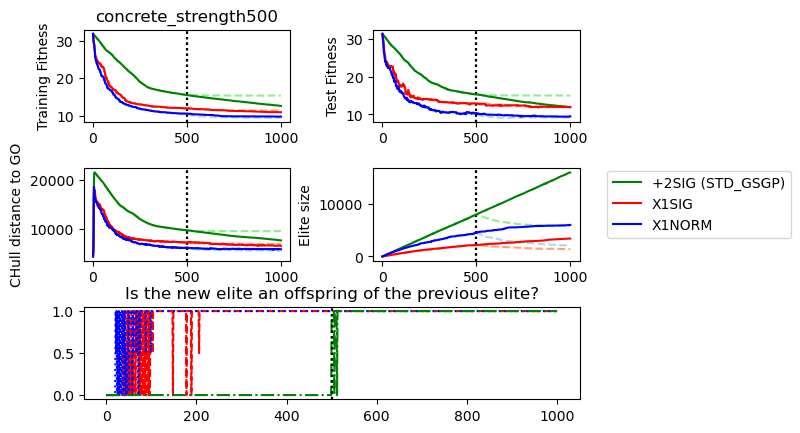

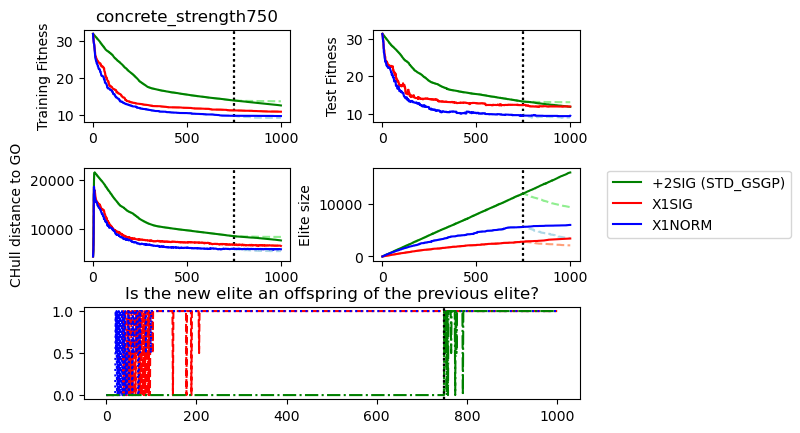

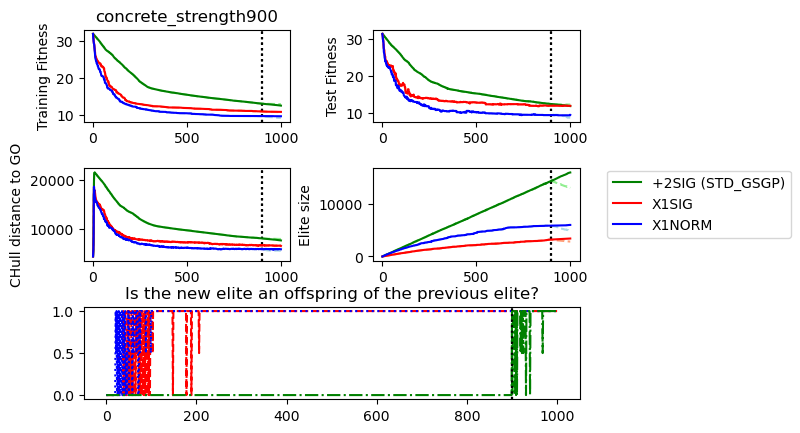

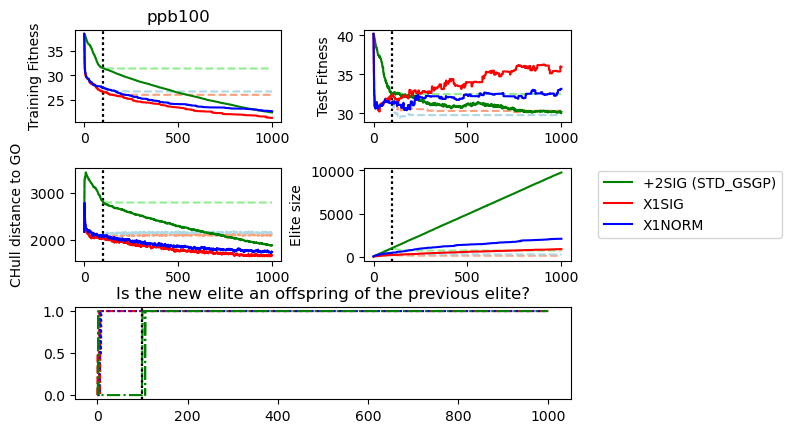

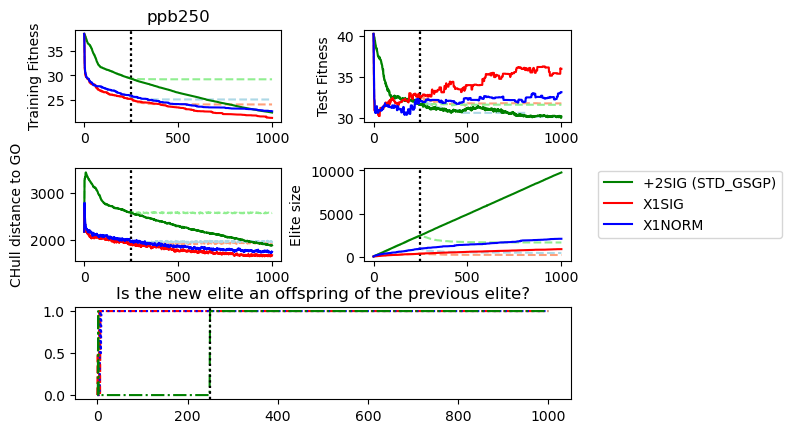

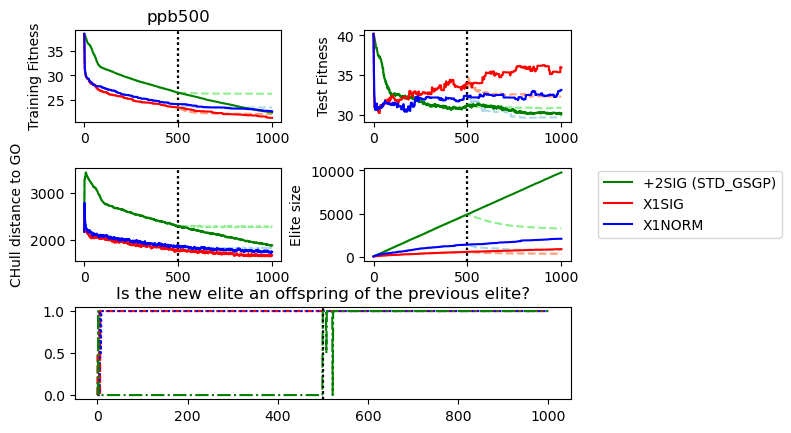

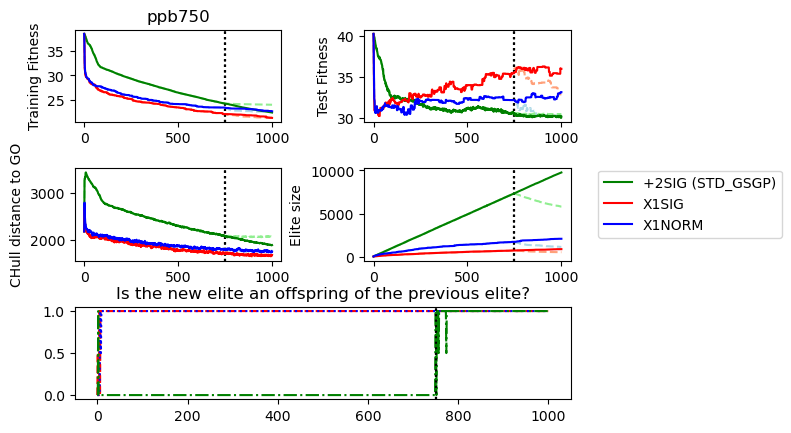

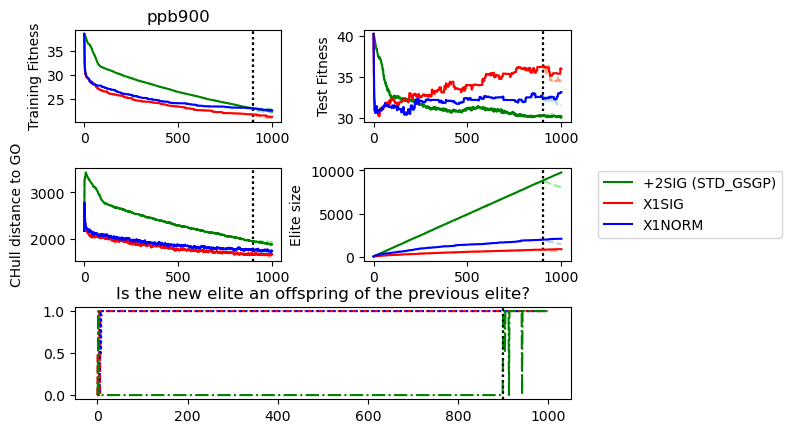

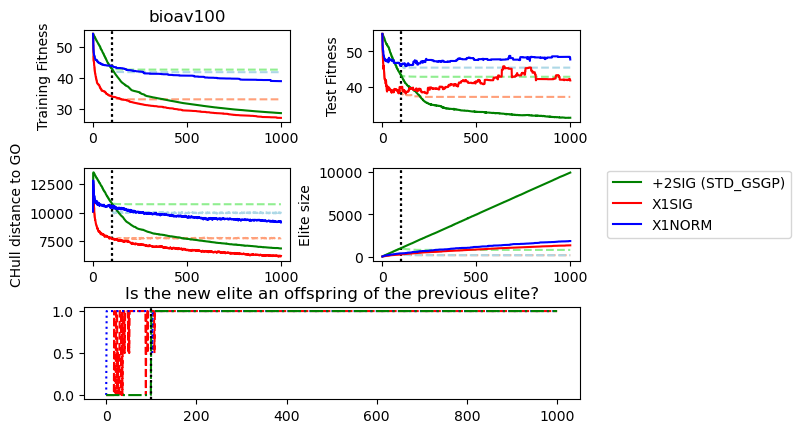

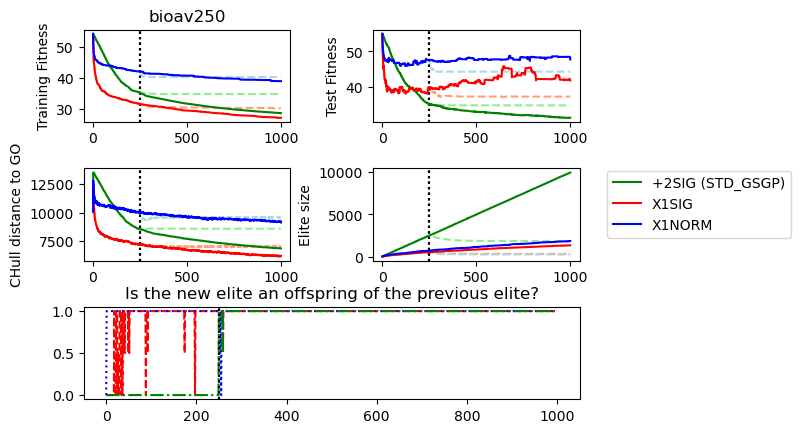

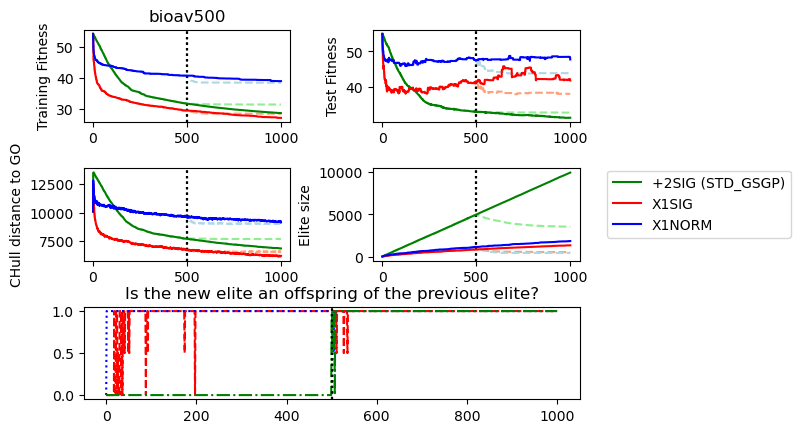

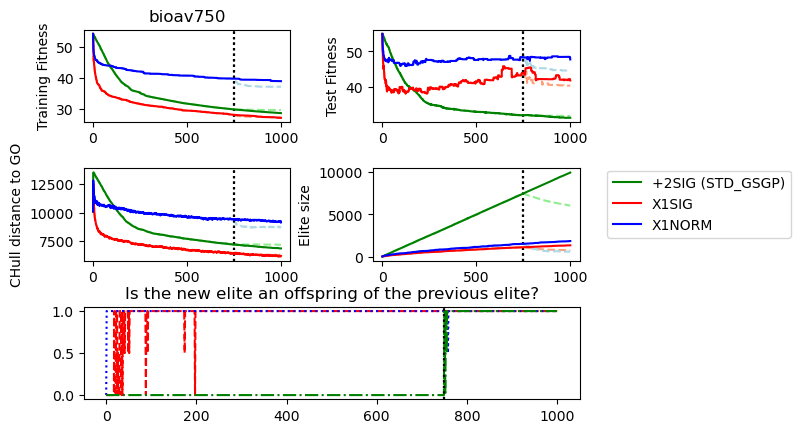

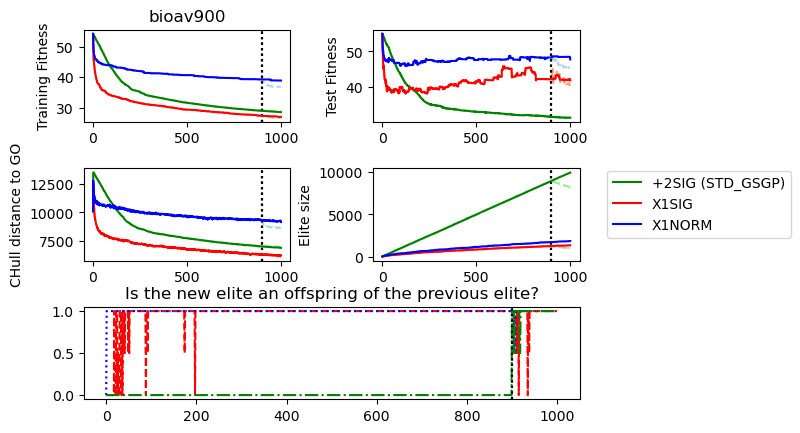

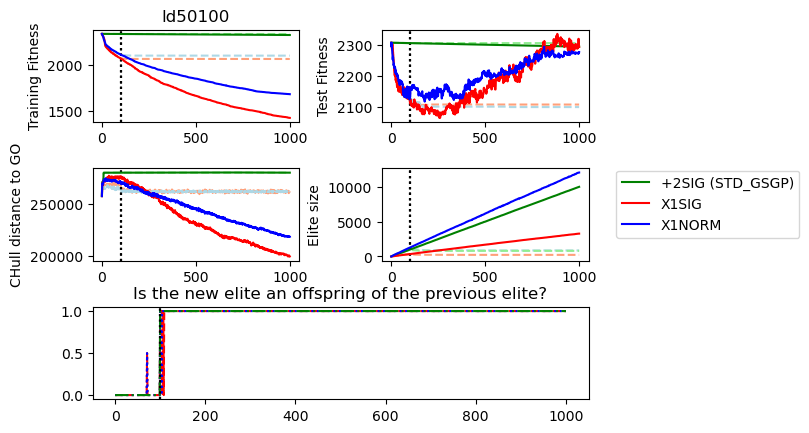

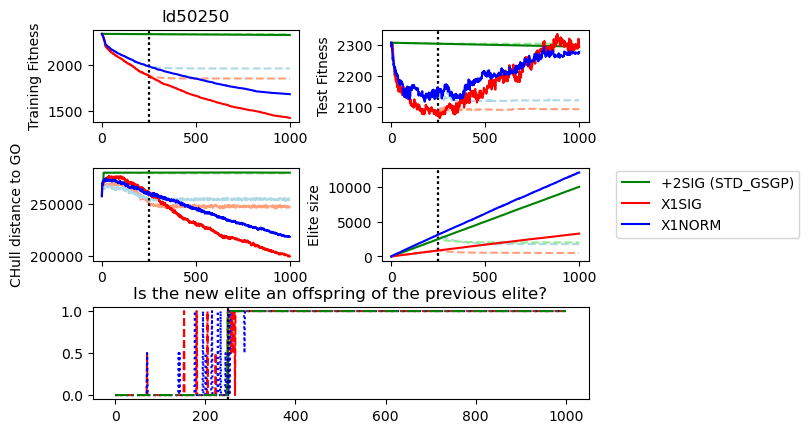

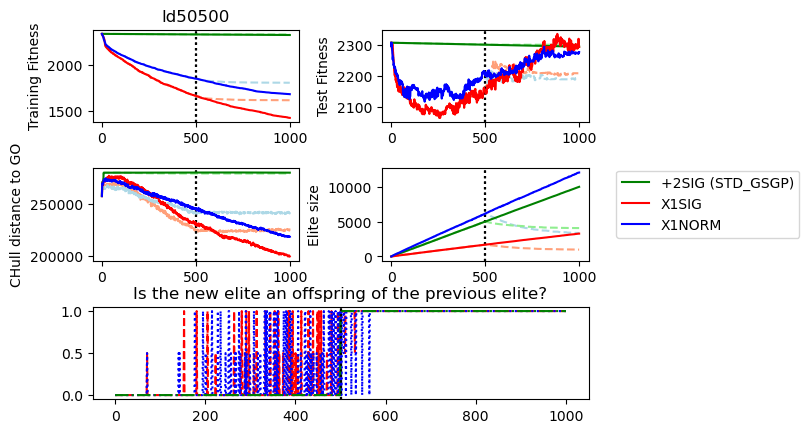

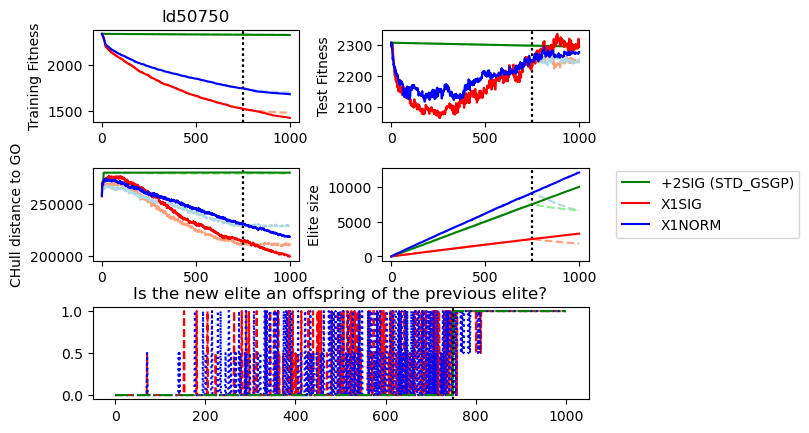

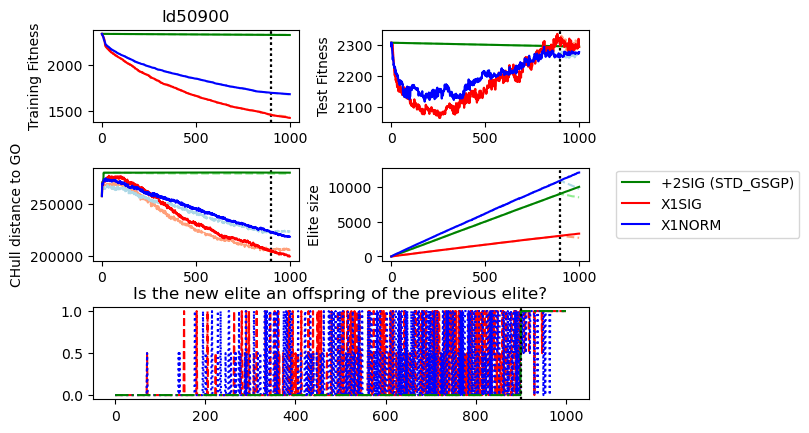

In [23]:
for data in results.dataset.unique():
    
    std_gsgp = results.query("algo == 'SLIM+2SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    gsgp_x1sig = results.query("algo == 'SLIM*1SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()
    gsgp_x1norm = results.query("algo == 'SLIM*1NORM' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull"]].groupby('generation').median()


    for th in [100, 250, 500, 750, 900]:
        gs = gridspec.GridSpec(3, 2)
        gs.update( wspace=0.4, hspace = 0.5)
        pl.figure()
        
        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
        
            
            grouped = results.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size", "distance_chull", "elite_child"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(grouped.index, grouped['training_fitness'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax1.set_ylabel('Training Fitness')


            ax2 = pl.subplot(gs[0, 1]) 
            pl.plot(grouped.index, grouped['test_fitness'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax2.set_ylabel('Test Fitness')
            
            
            ax3 = pl.subplot(gs[1, 0]) 
            pl.plot(grouped.index, grouped['distance_chull'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax3.set_ylabel('CHull distance to GO')
            
            ax4 = pl.subplot(gs[1, 1]) #1,1 
            # for j, it in enumerate(grouped['elite_change'].values):
            #     if j > th and it == 1:
            #         pl.axvline(x = j, color = colors[i])
            pl.plot(grouped.index, grouped['elite_size'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            # ax4.set_ylim(0, 3000)

            ax4.set_ylabel('Elite size')

            ax5 = pl.subplot(gs[2, :]) #1,1 
            
            # for j, it in enumerate(grouped['elite_change'].values):
            #     if j > th and it == 1:
            #         pl.axvline(x = j, color = colors[i])
            pl.plot(grouped.index, grouped['elite_child'], color = e_colors[i], linestyle = e_style[i]) #, linestyle = 'dashed', label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')

            ax5.set_title('Is the new elite an offspring of the previous elite?')
    
        ax1 = pl.subplot(gs[0, 0]) 
        pl.plot(std_gsgp.index, std_gsgp['training_fitness'], label = '+2SIG (STD_GSGP)', color = 'green')
        pl.plot(gsgp_x1sig.index, gsgp_x1sig['training_fitness'], label = 'X1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, gsgp_x1norm['training_fitness'], label = 'X1NORM', color = 'blue')


        ax2 = pl.subplot(gs[0, 1]) 
        pl.plot(std_gsgp.index, std_gsgp['test_fitness'], label = '+2SIG (STD_GSGP)', color = 'green')
        pl.plot(gsgp_x1sig.index, gsgp_x1sig['test_fitness'], label = 'X1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, gsgp_x1norm['test_fitness'], label = 'X1NORM', color = 'blue')


        ax3 = pl.subplot(gs[1, 0]) 
        pl.plot(std_gsgp.index, std_gsgp['distance_chull'], label = '+2SIG (STD_GSGP)', color = 'green')
        pl.plot(gsgp_x1sig.index, gsgp_x1sig['distance_chull'], label = 'X1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, gsgp_x1norm['distance_chull'], label = 'X1NORM', color = 'blue')

        ax4 = pl.subplot(gs[1, 1]) #1,1 
        pl.plot(std_gsgp.index, std_gsgp['elite_size'], label = '+2SIG (STD_GSGP)', color = 'green')
        pl.plot(gsgp_x1sig.index, gsgp_x1sig['elite_size'], label = 'X1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, gsgp_x1norm['elite_size'], label = 'X1NORM', color = 'blue')
            

        ax1.set_title(data + str(th))
        ax4.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()

In [18]:
def stat_test(measure, alpha = 0.05):
    
    total_results =  []
    
    for data in results.dataset.unique():
        
        std_gsgp = results.query("algo == 'SLIM+2SIG' and threshold == 1000 and dataset == @data and generation == 1000")[measure].values
        gsgp_x1sig = results.query("algo == 'SLIM*1SIG' and threshold == 1000 and dataset == @data and generation == 1000")[measure].values
        gsgp_x1norm = results.query("algo == 'SLIM*1NORM' and threshold == 1000 and dataset == @data and generation == 1000")[measure].values

        baselines = [
                    gsgp_x1sig,
                    gsgp_x1norm,
                    std_gsgp]
    

        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
            
            th_results = []
            
            for th in [100, 250, 500, 750, 900]:

                variant = results.query("algo == @algo and dataset == @data and threshold == @th and generation == 1000")[measure].values

                try:
                    p_value_n = mannwhitneyu(baselines[i], variant)[1]
                    p_value_s = str(round(p_value_n, 4)) if 'e' not in str(p_value_n) else (str(p_value_n).split('e')[0][:5] + 'e' + str(p_value_n)[-3:])
                    if p_value_n <= alpha:
                        if np.median(baselines[i]) > np.median(variant):
                            p_value_s +=' *'
                            
                        p_value_s = 'bo{ ' + p_value_s + ' }bc'
                    
                    th_results.append(p_value_s)
                except:
                    th_results.append('--')

            total_results.append([data, algo] + th_results)

    total_results = pd.DataFrame(total_results, columns = ['Data', 'Algorithm', 100, 250, 500, 750, 900])
    total_results.set_index(['Data', 'Algorithm'], inplace = True, drop = True)
    return total_results

In [19]:
test_stat = stat_test('test_fitness', alpha = 0.05/15)

In [20]:
size_stat = stat_test('elite_size', alpha = 0.05/15)

In [21]:
print(test_stat.to_latex())

\begin{tabular}{lllllll}
\toprule
 &  & 100 & 250 & 500 & 750 & 900 \\
Data & Algorithm &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{yatch} & SLIM*1SIG & bo{ 0.0001 }bc & 0.9587 & 0.217 & 0.2707 & 0.3711 \\
 & SLIM*1NORM & 0.3555 & 0.0877 & bo{ 0.0029 * }bc & bo{ 0.0011 * }bc & 0.0053 \\
 & SLIM+2SIG & bo{ 3.019e-11 }bc & bo{ 4.077e-11 }bc & bo{ 1.429e-08 }bc & bo{ 0.0018 }bc & 0.2062 \\
\cline{1-7}
\multirow[t]{3}{*}{airfoil} & SLIM*1SIG & bo{ 3.019e-11 }bc & bo{ 5.461e-09 }bc & bo{ 0.0008 }bc & 0.3042 & 0.7172 \\
 & SLIM*1NORM & bo{ 2.015e-08 }bc & bo{ 6.282e-06 }bc & 0.1761 & 0.61 & 0.3632 \\
 & SLIM+2SIG & bo{ 3.019e-11 }bc & bo{ 0.0008 }bc & bo{ 0.0009 }bc & 0.0051 & 0.0963 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_slump} & SLIM*1SIG & 0.947 & 0.4119 & 0.3953 & 0.3112 & 0.61 \\
 & SLIM*1NORM & 0.3953 & 0.6843 & 0.5592 & 0.3871 & 0.5592 \\
 & SLIM+2SIG & bo{ 0.0004 }bc & 0.1624 & 0.6204 & 1.0 & 0.8883 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_strength} & SLIM*1SIG & bo{ 0.0008 }

In [22]:
print(size_stat.to_latex())

\begin{tabular}{lllllll}
\toprule
 &  & 100 & 250 & 500 & 750 & 900 \\
Data & Algorithm &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{yatch} & SLIM*1SIG & bo{ 3.014e-11 * }bc & bo{ 3.016e-11 * }bc & bo{ 2.608e-10 * }bc & bo{ 8.345e-08 * }bc & bo{ 0.0001 * }bc \\
 & SLIM*1NORM & bo{ 3.016e-11 * }bc & bo{ 3.019e-11 * }bc & bo{ 3.689e-11 * }bc & bo{ 3.644e-08 * }bc & bo{ 4.787e-05 * }bc \\
 & SLIM+2SIG & bo{ 3.017e-11 * }bc & bo{ 3.016e-11 * }bc & bo{ 3.016e-11 * }bc & bo{ 3.016e-11 * }bc & bo{ 3.017e-11 * }bc \\
\cline{1-7}
\multirow[t]{3}{*}{airfoil} & SLIM*1SIG & bo{ 3.012e-11 * }bc & bo{ 3.014e-11 * }bc & bo{ 3.014e-11 * }bc & bo{ 5.483e-11 * }bc & bo{ 2.491e-08 * }bc \\
 & SLIM*1NORM & bo{ 3.019e-11 * }bc & bo{ 3.019e-11 * }bc & bo{ 3.017e-11 * }bc & bo{ 1.464e-10 * }bc & bo{ 7.890e-07 * }bc \\
 & SLIM+2SIG & bo{ 3.017e-11 * }bc & bo{ 3.017e-11 * }bc & bo{ 3.017e-11 * }bc & bo{ 3.019e-11 * }bc & bo{ 3.019e-11 * }bc \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_slump} & SLIM*1SIG & bo{ 3